# Explore here

In [1]:
# Your code here
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#load the data set
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
X = df[["MedInc", "Latitude", "Longitude"]]


In [4]:
#checking for Null
null_values = X.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 MedInc       0
Latitude     0
Longitude    0
dtype: int64


In [5]:
#Split the dataset

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



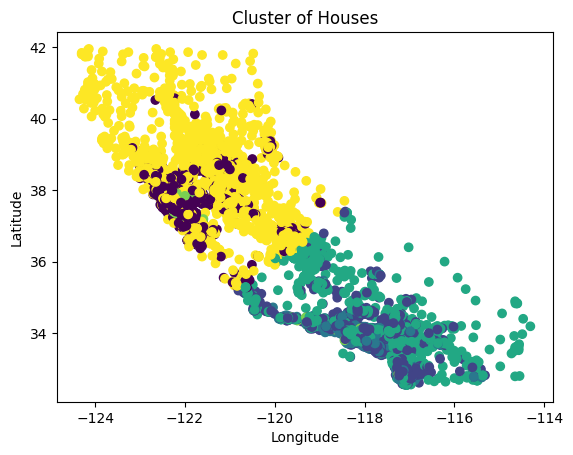

In [7]:
# Define and fit the K-Means model
kmeans = KMeans(n_clusters=6, random_state=42)
train['cluster'] = kmeans.fit_predict(train[['Latitude', 'Longitude', 'MedInc']])

# Plotting the clusters
plt.scatter(train['Longitude'], train['Latitude'], c=train['cluster'], cmap='viridis')
plt.title('Cluster of Houses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

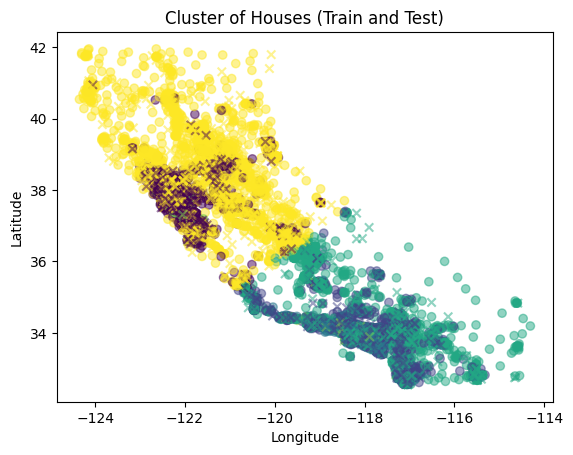

In [8]:
#Predict wit the test set
# Predict the clusters for the test set
test['cluster'] = kmeans.predict(test[['Latitude', 'Longitude', 'MedInc']])

# Plot both train and test sets with cluster coloring
plt.scatter(train['Longitude'], train['Latitude'], c=train['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(test['Longitude'], test['Latitude'], c=test['cluster'], cmap='viridis', alpha=0.5, marker='x')
plt.title('Cluster of Houses (Train and Test)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [9]:
#train a supervised classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare data for supervised learning
X_train = train[['Latitude', 'Longitude', 'MedInc']]
y_train = train['cluster']
X_test = test[['Latitude', 'Longitude', 'MedInc']]
y_test = test['cluster']

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
predictions = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



In [10]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predict on the test set
dt_predictions = dt.predict(X_test)


In [11]:
# Evaluate the model
print(classification_report(y_test, dt_predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       561
           1       1.00      0.99      1.00       983
           2       1.00      0.99      0.99       299
           3       0.99      1.00      0.99      1111
           4       0.94      0.98      0.96        62
           5       1.00      0.99      1.00      1112

    accuracy                           0.99      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       0.99      0.99      0.99      4128



In [13]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [14]:
scaler.fit(X_train)


StandardScaler()

In [18]:
X_train = scaler.transform(X_train)
X_train

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-24.79071078,  89.66985726,  -3.19813931],
       [-24.68203423,  89.52978564,  -3.11806667],
       [-24.59078694,  89.24220497,  -3.06827653],
       ...,
       [-24.65537772,  89.50251506,  -3.24523574],
       [-24.29141381,  89.05874833,  -2.84193268],
       [-24.27193405,  89.00172803,  -3.29721271]])

In [16]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.1951    ,  0.28534728, -1.15508475],
       [-0.23549054,  0.06097472, -0.70865905],
       [ 1.00947776, -1.42487026, -0.21040155],
       ...,
       [ 0.78014149, -1.23041404,  2.80902421],
       [ 0.52740357, -0.08860699, -0.57542978],
       [-0.66608108,  0.60445493, -0.17259111]])

In [23]:
# Make an array for K or n_neighbors hyperparameter values to test for
K_values = np.arange(2, 32, 2)
K_values

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

In [21]:
# And make an array for the p exponent used in the Minkowski metric
p_values = [1, 1.5, 2] #[0.5, 1, 1.5, 2, 2.5, 3]
# 1 is Manhattan metric
# 2 is Euclidian metric

In [22]:
# Put these in a parameters dictionary. The key must be the name of the hyperparmeter in the model
parameters_grid = {
    'n_neighbors' : K_values,
    'p' : p_values,
}

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
knn = KNeighborsClassifier() # model istantiated


In [26]:
grid_search = GridSearchCV(knn, parameters_grid, scoring='accuracy')


In [29]:
grid_search.fit(X_train, y_train)



GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                         'p': [1, 1.5, 2]},
             scoring='accuracy')

In [30]:
grid_search.best_params_


{'n_neighbors': 8, 'p': 1.5}

In [31]:
knn_optimal = grid_search.best_estimator_
knn_optimal

KNeighborsClassifier(n_neighbors=8, p=1.5)

In [32]:
grid_search.best_score_


0.9895834467977187

In [33]:
CV_df = pd.DataFrame(grid_search.cv_results_)
CV_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007859,0.001596,0.118093,0.011493,2,1,"{'n_neighbors': 2, 'p': 1}",0.986982,0.987587,0.987886,0.983646,0.988492,0.986919,0.001707,38
1,0.007475,0.001271,0.169782,0.039060,2,1.5,"{'n_neighbors': 2, 'p': 1.5}",0.986073,0.987890,0.988189,0.984555,0.988795,0.987100,0.001563,36
2,0.006296,0.000180,0.125357,0.022797,2,2,"{'n_neighbors': 2, 'p': 2}",0.985771,0.988798,0.988189,0.985161,0.989098,0.987403,0.001620,33
3,0.006061,0.000040,0.108584,0.002103,4,1,"{'n_neighbors': 4, 'p': 1}",0.986073,0.985771,0.990309,0.986372,0.990006,0.987706,0.002013,25
4,0.006932,0.001349,0.167811,0.043144,4,1.5,"{'n_neighbors': 4, 'p': 1.5}",0.985468,0.987587,0.991217,0.984555,0.989703,0.987706,0.002501,26


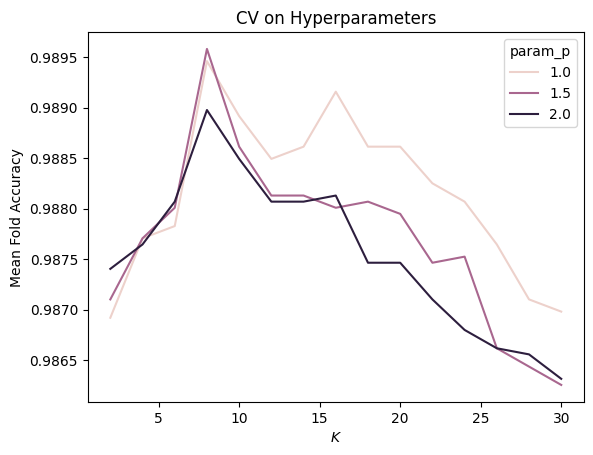

In [34]:
sns.lineplot(data=CV_df, x='param_n_neighbors', y='mean_test_score', hue='param_p')
plt.xlabel('$K$')
plt.ylabel('Mean Fold Accuracy')
plt.title('CV on Hyperparameters')
plt.show()

In [35]:
#Final Evaluation on the Testing Data
y_train_predict = knn_optimal.predict(X_train)
y_train_predict

array([3, 1, 1, ..., 3, 0, 5], dtype=int32)

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_predict)

0.9934593023255814

In [37]:
np.mean(y_train == y_train_predict)


0.9934593023255814

In [38]:
knn_optimal.score(X_train, y_train)


0.9934593023255814